# Assignment: Clustering

This assingment aims to test your understanding of clustering.

## Exercise 1

Please implement and test the following distance metrics:

a) Euclidian distance

b) Manhattan distance

c) Pearson vorrelation coefficient

Please take into account that some features for some samples could be missing.

In [21]:
import numpy as np


def Handle_Nans(sample1, sample2):
    # implement some algorithm that will remove elements in sample1 and sample with index i, 
    # if sample1[i] is Nan or sample2[i] is Nan
    pass

def Euclidian_dist(sample1, sample2):
    pass

def Manhattan_dist(sample1, sample2):
    pass

def Pearson_dist(sample1, sample2):
    pass


def main():
    sample1 = np.asarray([17, 28, 37, 23, 8, float('Nan')])
    sample2 = np.asarray([21, 35, float('Nan'), 23, 2, 5])
    
    print(Euclidian_dist(sample1, sample2))
    print(Manhattan_dist(sample1, sample2))
    print(Pearson_dist(sample1, sample2))
    
main()

101.0
17.0
0.9738876639603918


## Exercise 2

Please implement and test the silhouette score and compare its performance to silhouette_score from sklearn.metrics 

in-house silhouette score:
0.8371641514077857
silhouette score from sklearn:
0.8371641514077857


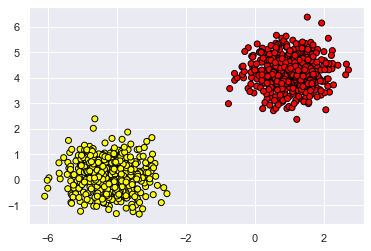

In [50]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score, silhouette_samples

def compute_elemtwise_distance(data):
    return distance_matrix(data, data)

def compute_silhouette_score_x(distance_map, labels, ind, n_clusters):
    pass

def compute_silhouette_score(data, labels, n_clusters):
    distance_map = compute_elemtwise_distance(data)
    score = []
    for i in range(0, len(labels)):
        score.append(compute_silhouette_score_x(distance_map, labels, i, n_clusters))
    return np.mean(score)

def main():
    
    n_clusters = 2
    data, labels = make_blobs(n_samples = 1000, centers = n_clusters,
                      random_state = 3, cluster_std = 0.6)
    plt.scatter(data[:, 0], data[:, 1], c = labels, 
                cmap = 'autumn', linewidths = 1, edgecolors = 'black')
    print('in-house silhouette score:')
    print(compute_silhouette_score(data, labels, n_clusters))
    print('silhouette score from sklearn:')
    print(silhouette_score(data, labels))
    
main()

## Exercise 3

Please compute silhouette score for different number of clusters in k-Mean algorithm. Select the optimal k with the highest silhouette score.

You are allowed to use KMeans and silhouette_score from sklearn.

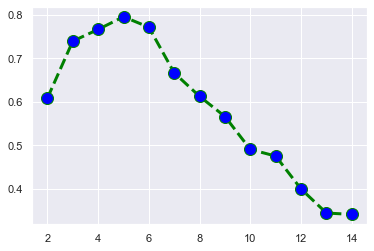

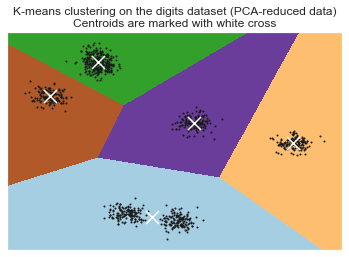

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def visualizeKMeans(data, kmeans):
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white crosses')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


def find_optimal_k(data, labels):
    # please plot values for different k's
    pass

def main():
    n_clusters = 7
    plt.figure(0)
    data, labels = make_blobs(n_samples = 1000, centers = n_clusters,
                              random_state = 5, cluster_std = 0.5)
    
    k = find_optimal_k(data, labels)
    
    plt.figure(1)
    kmeans = KMeans(n_clusters = k).fit(data)
    visualizeKMeans(data, kmeans)
    
main()